<a href="https://colab.research.google.com/github/ANGEL201985/Proctor-Modificado/blob/main/Taller_Proctor_Modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,1,2,3,4
PESO MOLDE + SUELO,10560.40,10768.30,10954.00,10972.90
PESO MOLDE,6068.00,6068.00,6068.00,6068.00
PESO SUELO COMPACTADO,4492.40,4700.30,4886.00,4904.90
DENSIDAD HUMEDA,2.15,2.25,2.34,2.35
PESO SUELO HUMEDO + TARA,502.90,510.60,540.20,518.60
DENSIDAD SECA,2.10,2.15,2.19,2.16
CONTENIDO DE HUMEDAD,2.59,4.70,6.70,8.61


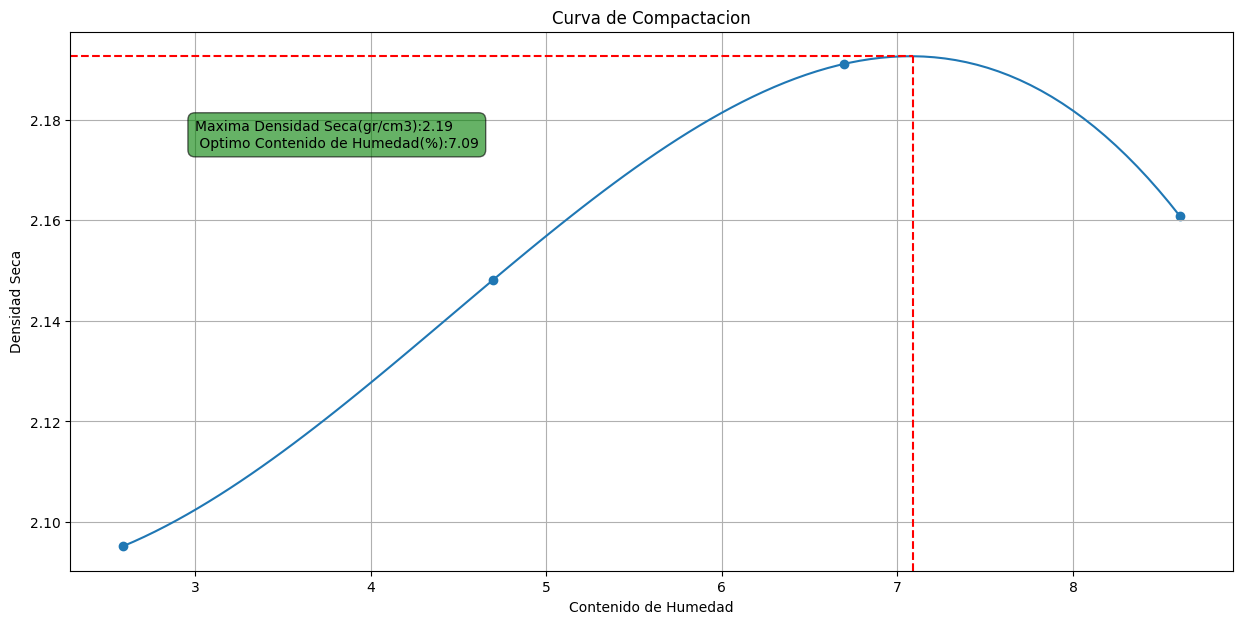

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.core.display import display

peso_model_suelo = np.array([10560.4, 10768.3, 10954, 10972.9])
peso_molde = 6068
peso_suelos_compactado = np.subtract(peso_model_suelo, peso_molde)
volumen_molde = 2090
densidad_humeda = np.divide(peso_suelos_compactado, volumen_molde)
peso_suelo_humedo_tara = np.array([502.9, 510.6, 540.2, 518.6])
peso_suelo_seco_tara = np.array([490.2, 487.7, 506.3, 477.5])
peso_agua = np.subtract(peso_suelo_humedo_tara, peso_suelo_seco_tara )
peso_suelo_seco = peso_suelo_seco_tara
contenido_humedad = np.divide(peso_agua*100,peso_suelo_seco)
densidad_seca = np.divide(densidad_humeda, 1+contenido_humedad/100)


tabla = {'PESO MOLDE + SUELO': peso_model_suelo, 'PESO MOLDE': peso_molde , 'PESO SUELO COMPACTADO':peso_suelos_compactado, 'DENSIDAD HUMEDA': densidad_humeda, 'PESO SUELO HUMEDO + TARA':peso_suelo_humedo_tara, "DENSIDAD SECA": densidad_seca, "CONTENIDO DE HUMEDAD": contenido_humedad }

tabla_pandas = pd.DataFrame(tabla, index = [1,2,3,4]).T.round(3)
tabla_estilos = (
    tabla_pandas.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))
# Haciendo el ajuste de regersion polinomial usando la funcion "polyfit"
coeficientes = np.polyfit(contenido_humedad, densidad_seca, 3)

poly = np.poly1d(coeficientes)



# Crear unos 1000 puntos usando la funcion linspace()
contenido_humedad_rango = np.linspace(min(contenido_humedad), max(contenido_humedad), 100)
calculo_densidad_seca = poly(contenido_humedad_rango)
indice_max_densidad_seca = np.argmax(calculo_densidad_seca)
contenido_humedad_max = contenido_humedad_rango[indice_max_densidad_seca]


densidad_seca_max = np.max(calculo_densidad_seca)


coeficientes[-1] = coeficientes[-1] - densidad_seca_max

raices = np.roots(poly)
contenido_humedad_max_0 = np.max(raices)

# Usnaod la funcion de matplotlib scatter
plt.figure(figsize= (15,7))


plt.scatter(contenido_humedad,densidad_seca )
plt.plot(contenido_humedad_rango, calculo_densidad_seca )

#Normalizando datos
ax = plt.gca()

x_min,x_max= ax.get_xlim()
y_min,y_max = ax.get_ylim()

#Calculando los valores normalizados
x_normalizado = (contenido_humedad_max-x_min)/(x_max-x_min)
y_normalizado = (densidad_seca_max-y_min)/(y_max-y_min)

plt.axvline(x = contenido_humedad_max , ymin = 0, ymax = y_normalizado, color= 'red', linestyle= '--')
plt.axhline(y = densidad_seca_max , xmin = 0, xmax = x_normalizado, color= 'red', linestyle= '--')


plt.title('Curva de Compactacion')
plt.xlabel('Contenido de Humedad')
plt.ylabel('Densidad Seca')
plt.text(3, 2.18, f'Maxima Densidad Seca(gr/cm3):{densidad_seca_max:.2f}\n Optimo Contenido de Humedad(%):{contenido_humedad_max:.2f}', horizontalalignment = 'left', verticalalignment = 'top', bbox= dict(facecolor= 'green', alpha =0.6, edgecolor ='black', boxstyle= 'round, pad = 0.5'))
plt.grid()
plt.show()








